In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib nbagg

# Ordinary differential equations (ODE)

## Scope

* Widely used in physics
* Closed form solutions only in particular cases
* Need for numerical solvers

## Ordinary differential equations vs. partial differential equation 

### Ordinary differential equations (ODE)

Derivatives of the inknown function only with respect to a single variable, time $t$ for example. 


* Example: the 1D linear oscillator equation

$$
\dfrac{d^2x}{dt^2} + 2 \zeta \omega_0 \dfrac{dx}{dt} + \omega_0 x = 0
$$


### Partial differential equations (PDE)

Derivatives of the unknown function with respect to several variables, time $t$ and space $(x, y, z)$ for example. Special techniques not introduced in this course need to be used, such as finite difference or finite elements.

* Example : the heat equation

$$
\rho C_p \dfrac{\partial T}{\partial t} - k  \Delta T + s = 0
$$


## Introductive example

Point mass $P$ in free fall. 

Required data:

* gravity field $\vec g = (0, -g)$,
* Mass $m$,
* Initial position $P_0 = (0, 0)$
* Initial velocity $\vec V_0 = (v_{x0}, v_{y0})$

Problem formulation:
$$
\left\lbrace \begin{align*}
\ddot x & = 0\\
\ddot y & = -g
\end{align*}\right.
$$



## Closed form solution


$$
\left\lbrace \begin{align*}
x(t) &= v_{x0} t\\
y(t) &= -g \frac{t^2}{2} + v_{y0}t 
\end{align*}\right.
$$

<IPython.core.display.Javascript object>


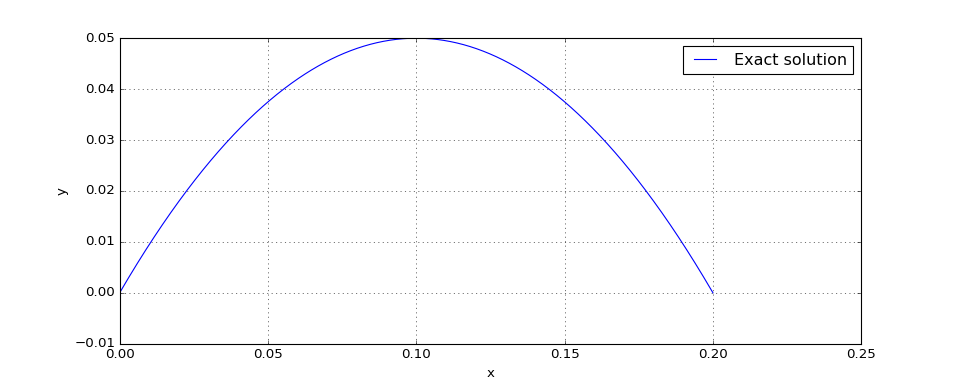

In [12]:
tmax = .2
t  = np.linspace(0., tmax, 1000) 
x0, y0   = 0., 0. 
vx0, vy0 = 1., 1.
g = 10.
x = vx0 * t
y = -g  * t**2/2. + vy0 * t
fig = plt.figure()
ax.set_aspect("equal")
plt.plot(x, y, label = "Exact solution")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## Reformulation

Any ODEs can be reformulated as a first order system equations. Let's assume that
$$
X = \begin{bmatrix}
X_0 \\
X_1 \\
X_2 \\
X_3 \\
\end{bmatrix}
=
\begin{bmatrix}
x \\
y \\
\dot x \\
\dot y \\
\end{bmatrix}
$$ 

As a consequence:

$$
\dot X = \begin{bmatrix}
\dot x \\
\dot y \\
\ddot x \\
\ddot y \\
\end{bmatrix}
$$ 

Then, the initialy second order equation can be reformulated as:

$$
\dot X = f(X, t) = 
\begin{bmatrix}
X_2 \\
X_3 \\
0 \\
-g \\
\end{bmatrix}
$$ 

Generic problem

Solving $\dot Y = f(Y, t)$




## Numerical integration of ODE

Generic formulation

$$
\dot X = f(X, t)
$$

* approximate solution: need for error estimation
* discrete time: $t_0$, $t_1$, $\ldots$
* time step $dt = t_{i+1} - t_i$,


## Euler method
* Intuitive
* Fast
* Slow convergence

$$
X_{i+1} = X_i + f(X, t_i) dt
$$

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 227 µs


<IPython.core.display.Javascript object>


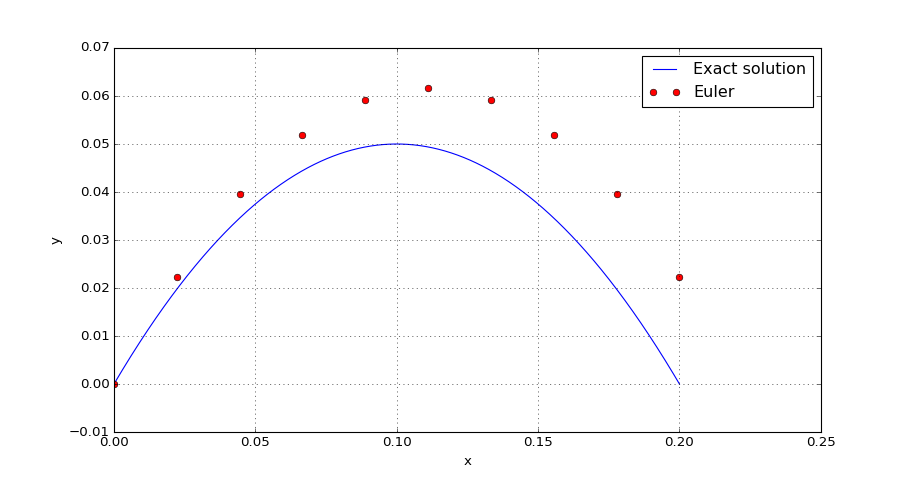

In [20]:
dt = 0.02 # Pas de temps
X0 = np.array([0., 0., vx0, vy0])
nt = int(tmax/dt) # Nombre de pas
ti = np.linspace(0., nt * dt, nt)

def derivate(X, t):
  return np.array([X[2], X[3], 0., -g])

def Euler(func, X0, t):
  dt = t[1] - t[0]
  nt = len(t)
  X  = np.zeros([nt, len(X0)])
  X[0] = X0
  for i in range(nt-1):
    X[i+1] = X[i] + func(X[i], t[i]) * dt
  return X

%time X_euler = Euler(derivate, X0, ti)
x_euler, y_euler = X_euler[:,0], X_euler[:,1]

plt.figure()
plt.plot(x, y, label = "Exact solution")
plt.plot(x_euler, y_euler, "or", label = "Euler")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Runge Kutta 4

[Wikipedia](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Explicit_Runge.E2.80.93Kutta_methods)

Evolution of the Euler integrator with:

* Multiple slope evaluation (4 here),
* Well chosen weighting to match simple solutions.

$$
X_{i+1} = X_i + \dfrac{dt}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right)
$$


With: 


* $k_1$ is the increment based on the slope at the beginning of the interval, using $ X $ (Euler's method);
* $k_2$ is the increment based on the slope at the midpoint of the interval, using  $ X + dt/2 \times k_1 $;
* $k_3$ is again the increment based on the slope at the midpoint, but now using    $ X + dt/2\times k_2 $;
* $k_4$ is the increment based on the slope at the end of the interval, using       $ X + dt \times k_3 $.


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 444 µs


<IPython.core.display.Javascript object>


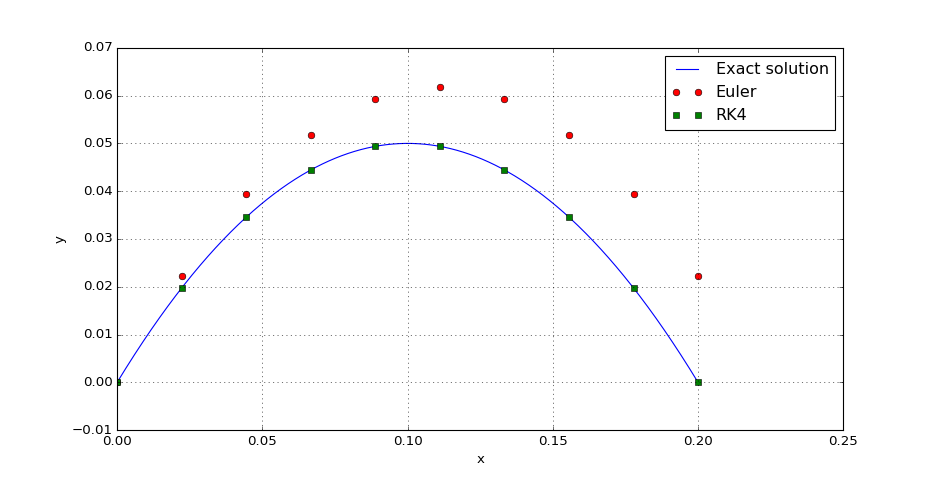

In [19]:
def RK4(func, X0, t):
  dt = t[1] - t[0]
  nt = len(t)
  X  = np.zeros([nt, len(X0)])
  X[0] = X0
  for i in range(nt-1):
    k1 = func(X[i], t[i])
    k2 = func(X[i] + dt/2. * k1, t[i] + dt/2.)
    k3 = func(X[i] + dt/2. * k2, t[i] + dt/2.)
    k4 = func(X[i] + dt    * k3, t[i] + dt)
    X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
  return X

%time X_rk4 = RK4(derivate, X0, ti)
x_rk4, y_rk4 = X_rk4[:,0], X_rk4[:,1]

plt.figure()
plt.plot(x, y, label = "Exact solution")
plt.plot(x_euler, y_euler, "or", label = "Euler")
plt.plot(x_rk4, y_rk4, "gs", label = "RK4")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Using ODEint 

http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.integrate.odeint.html

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs


<IPython.core.display.Javascript object>


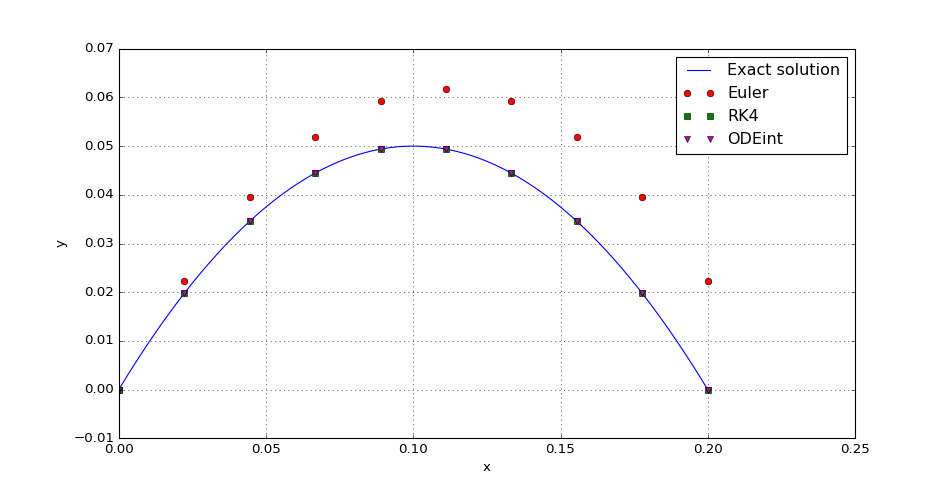

In [18]:
from scipy import integrate

X_odeint = integrate.odeint(derivate, X0, ti)
%time x_odeint, y_odeint = X_odeint[:,0], X_rk4[:,1]

plt.figure()
plt.plot(x, y, label = "Exact solution")
plt.plot(x_euler, y_euler, "or", label = "Euler")
plt.plot(x_rk4, y_rk4, "gs", label = "RK4")
plt.plot(x_odeint, y_odeint, "mv", label = "ODEint")

plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Tutorial (TD)

In this example, you have to model and animate a pendulum.

1. Write the constitutive equations.
2. Reformulate the equations as a first order system of ODEs.
3. Solve the problem using Euler, RK4 and ODE integrators.
4. Compare the results.